<a href="https://colab.research.google.com/github/samruddhibisen03/IIIT-HYD-Project-Code-Crew-/blob/main/FashionMNIST_dataset_CNN_Classification_by_aniket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks (CNNs) using PyTorch
Convolutional Neural Networks (CNNs) are specialized for image and grid-like data processing. They use convolutional layers to detect local patterns such as edges and textures, followed by pooling layers to reduce dimensionality. CNNs excel in image recognition and computer vision tasks by capturing spatial hierarchies of features.

#Step 1: Install Necessary Libraries
Install PyTorch, torchvision for datasets, and matplotlib for plotting.

In [ ]:
!pip install torch torchvision matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

#Step 2: Import Libraries
Import necessary libraries for building, training, and visualizing the neural network.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


#Step 3: Define Transformations for the Dataset
Convert images to PyTorch tensors and normalize them to have mean 0.5 and standard deviation 0.5.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


#Step 4: Load the Fashion MNIST Dataset
Download and load the Fashion MNIST training and test datasets, applying the defined transformations.

In [ ]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 26421880/26421880 [00:01<00:00, 21129536.41it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 339405.83it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6209764.10it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18566016.33it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



#Step 5: Create DataLoaders
Create data loaders to iterate through the datasets in batches, shuffling the training data.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


#Step 6: Define the CNN Model
Define a CNN with two convolutional layers, max-pooling, and three fully connected layers for classification.

In [ ]:
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#Step 7: Initialize Model, Loss Function, and Optimizer
Instantiate the CNN model, define the cross-entropy loss function, and set up the Adam optimizer.

In [ ]:
model = CNNNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#Step 8: Training the Model
Train the model for a specified number of epochs, performing forward and backward passes, computing the loss, updating the model weights, and calculating accuracy.

In [ ]:
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    training_losses = []
    training_accuracies = []
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            optimizer.zero_grad()          # Clear the gradients
            outputs = model(images)        # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss
            loss.backward()                # Backward pass
            optimizer.step()               # Update the weights
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        training_loss = running_loss / len(train_loader)
        training_accuracy = correct / total
        training_losses.append(training_loss)
        training_accuracies.append(training_accuracy)

        print(f'Epoch {epoch+1}, Loss: {training_loss}, Accuracy: {training_accuracy}')
    return training_losses, training_accuracies


#Step 9: Testing the Model
Evaluate the model on the test dataset, calculating the average loss and accuracy without gradient updates.

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            test_loss += criterion(outputs, labels).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * test_accuracy:.2f}%)\n')


#Step 10: Plotting Training and Validation Loss and Accuracy
Plot the training loss and accuracy over epochs to visualize the model's learning process.

In [ ]:
def plot_metrics(train_losses, train_accuracies, epochs):
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


#Step 11: Visualizing Sample Images
Plot a few sample images from the dataset along with their labels for visualization.

In [ ]:
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].view(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
    plt.show()


#Step 12: Visualizing Model Predictions
Plot a few sample images along with their true labels and the model's predictions for comparison.

In [ ]:
def plot_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].view(28, 28), cmap='gray')
        plt.title(f"True: {labels[i].item()}\nPred: {predictions[i].item()}")
        plt.axis('off')
    plt.show()


#Step 13: Train the Model
Train the CNN model on the Fashion MNIST training dataset for 5 epochs.

In [ ]:
train_losses, train_accuracies = train(model, train_loader, criterion, optimizer, epochs=5)


Epoch 1, Loss: 0.46926113804266145, Accuracy: 0.8285666666666667
Epoch 2, Loss: 0.2979015450932578, Accuracy: 0.8916166666666666
Epoch 3, Loss: 0.24989227826661392, Accuracy: 0.9089333333333334
Epoch 4, Loss: 0.21521217554315195, Accuracy: 0.9208333333333333
Epoch 5, Loss: 0.19001383063143124, Accuracy: 0.9287666666666666


#Step 14: Test the Model
Evaluate the trained CNN model on the Fashion MNIST test dataset and print the results.

In [ ]:
test(model, test_loader, criterion)



Test set: Average loss: 0.0002, Accuracy: 9153/10000 (91.53%)



#Step 15: Visualize Some Sample Images
Display a few sample images from the training dataset for visualization.

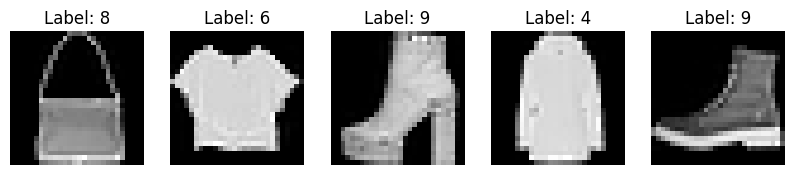

In [ ]:
sample_images, sample_labels = next(iter(train_loader))
plot_sample_images(sample_images[:5], sample_labels[:5])


#Step 16: Plot Training Loss and Accuracy
Plot the training loss and accuracy over the epochs to visualize the model's performance.

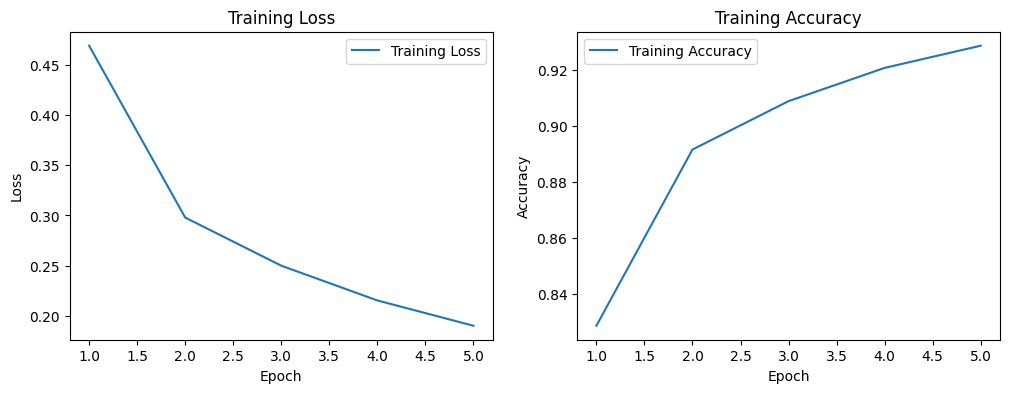

In [ ]:
plot_metrics(train_losses, train_accuracies, epochs=5)


#Step 17: Visualize Model Predictions
Show the model's predictions on a few sample images, comparing them with the true labels.

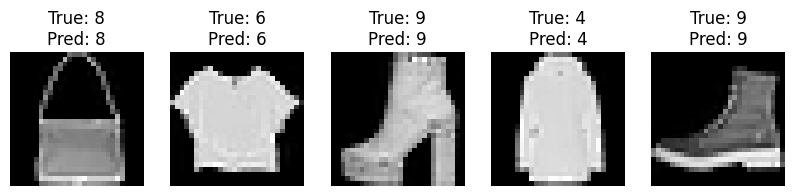

In [ ]:
model.eval()
sample_outputs = model(sample_images[:5])
_, sample_predictions = torch.max(sample_outputs, 1)
plot_predictions(sample_images[:5], sample_labels[:5], sample_predictions)


#Conclusion
This project implemented a Convolutional Neural Network (CNN) in PyTorch to classify items from the Fashion MNIST dataset. Key highlights include:

<b>Data Preparation:</b> Fashion MNIST dataset normalized and transformed using PyTorch.

<b>Model:</b> CNN architecture with convolutional and fully connected layers.

<b>Training:</b> Model trained over 5 epochs using Adam optimizer and cross-entropy loss.

<b>Results:</b> Achieved high test accuracy, demonstrating effective fashion item recognition.

<b>Visualization:</b> Sample images visualized with their true and predicted labels.
